# Election Data Project - Polls and Donors

This data analysis project looks at data from the US 2012 election.

There are two datasets to analyse here. The first dataset is the results of political polls. We will analyze this aggregated poll data and answer some questions:

1.) Who was being polled and what was their party affiliation?

2.) Did the poll results favor Romney or Obama?

3.) How do undecided voters affect the poll?

4.) Can we account for the undecided voters?

5.) How did voter sentiment change over time?

6.) Can we see an effect in the polls from the debate?

The next dataset is donor dataset which will be looked at a later stage.

## Polls Dataset

In [1]:
# standard imports
# for data manipulation and analysis
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# for vizualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# to be able to view the plots in Ipython notebook, call '%matplotlib inline'
# this is one of the magical commands
%matplotlib inline

C:\Users\BEN KOLE\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The data for the polls is obtained from HuffPost Pollster. It has some political datasets to play with. 

Here is the url for obtaining the data in csv format:
http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv

In [2]:
# Let's now grab our election poll data which is in csv format and set it as a dataframe
poll_df = pd.read_csv("2012-general-election-romney-vs-obama.csv")

Now that we have our polls dataframe, let's go ahead and take a look at it.

In [3]:
# grab some general information about the dataframe by calling .info() method on the dataframe
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                586 non-null    object 
 1   Start Date              586 non-null    object 
 2   End Date                586 non-null    object 
 3   Entry Date/Time (ET)    586 non-null    object 
 4   Number of Observations  564 non-null    float64
 5   Population              586 non-null    object 
 6   Mode                    586 non-null    object 
 7   Obama                   586 non-null    float64
 8   Romney                  586 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            586 non-null    object 
 12  Source URL              584 non-null    object 
 13  Partisan                586 non-null    object 
 14  Affiliation             586 non-null    ob

Great! So, we can see that the dataframe has 17 columns to work with, and 586 rows (entries). It looks like the 'Question Text' column has all values as null, meaning it has no data points on it.

In [4]:
# let's inspect the dataframe and see how it looks like
# To preview the dataframe, call .head() method on it
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


Some understanding on the dataframe:

    Pollster - who was doing the polls?
    Start Date - the date that the Pollster started taking the polls
    End Date - the date that the Pollster finished taking the polls
    Entry Date/Time - the time they recorded the polls down
    Number of Observations - how many polls were recorded by the pollster?
    Population - who are the people that the Pollster took the polls from?
    Mode - what mode was used for taking the polls?
    Obama - what percentage of the observations/people favored Obama?
    Romney - what percentage favored Romney?
    Undecided - what percentage was undecided (not sure) on who to vote?
    Partisan - what was the party or body that carried the polls?
    Affiliation - did the polls have an affiliation or a relationship towards a particular party?

Let's now get to the analysis of the dataframe and get some insights or try to answer the questions that we have.

##### Qn 1.) Who was being polled and what was their party affiliation?
To answer the first part of this question, we will look into the 'Population' column. The other part of the question is answered by the 'Affiliation' column. So,a combination of the two should give us some insights of who these people who were being polled were; what was their affiliation?

Let's get a visualization of the party affiliations.

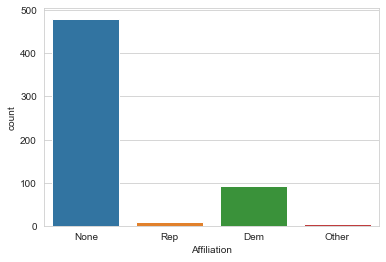

In [5]:
# use seaborn sns.countplot() to see how the affiliation was distributed
sns.countplot('Affiliation',data=poll_df)

From the above plot, it looks like most of the polls that were carried out had no affiliation to any party, which is good and just. However, we notice that there was quite some number of polls that had an affiliation towards the Democrats party. 

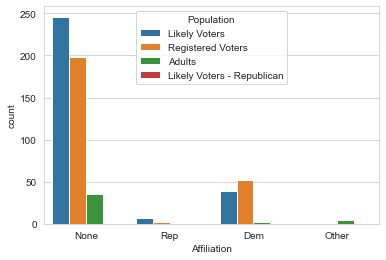

In [6]:
# Let's see if sorting by the Population hue gives us any further insight into the data.
sns.countplot(x='Affiliation',data=poll_df,hue='Population')

Looks like we have a strong showing of likely voters and Registered Voters, so the poll data should hopefully be a good reflection on the populations polled.

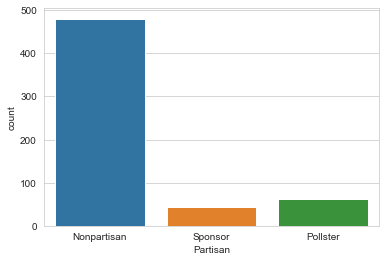

In [7]:
sns.countplot('Partisan',data=poll_df)

Most of the bodies that carried the polls were non-partisan; they had no relationship with any of the policitical parties. That is fair. However there was quite some number of polls that were carried by Sponsors of political parties and others were just carried out by known Pollsters.

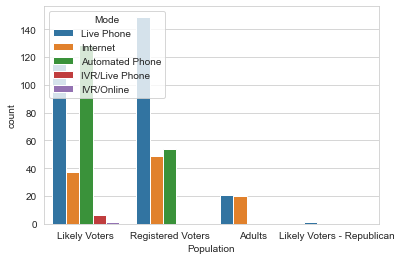

In [8]:
sns.countplot('Population',data=poll_df,hue='Mode')

There were different modes used in polling done on different samples of voters. It's clear that 'Live Phone' method was commonly used in the polling.

In [9]:
# let's preview the dataframe again
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


##### Qn 2.) Did the poll results favor Romney or Obama?
Let's go ahead and take a look at the percentages that faovered Obama, Romney , and the polled people who remained undecided. So, we will get the averages for Obama, Romney and undecided people.

In [10]:
# First, we will get the averages for Obama,Romney and Undecided, and create a dataframe for the averages
avg = pd.DataFrame(poll_df[['Obama','Romney','Undecided']].mean())
avg.head()

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827


In [11]:
# after that we will get their standard deviations
std = pd.DataFrame(poll_df[['Obama','Romney','Undecided']].std())
std.head()

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754


Let's now use pandas built-in .plot() method to visualize a barplot for the averages and set the standard deviations as the error bars.

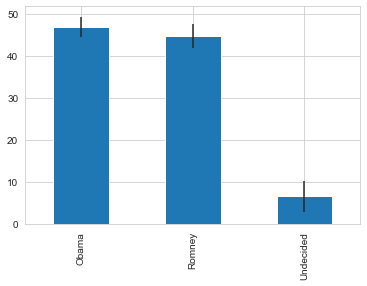

In [12]:
# plot using pandas built-in .plot() method, with kind='bar' and yerr='std'
avg.plot(yerr=std,kind='bar',legend=False)

It's interesting to see how close these polls seem to be, especially considering the undecided factor. Let's take a look at their numbers. 

In [13]:
# let's make a dataframe showing both the averages and standard deviations, using pandas concat method
# we shall call this dataframe 'poll_avg'
poll_avg = pd.concat([avg,std],axis=1)

In [14]:
# preview the newly created poll_avg dataframe
poll_avg.head()

,0,0
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


In [15]:
# let's rename the columns of the poll_avg dataframe
poll_avg.columns = ['Average','STD']

In [16]:
# let's now preview poll_avg with the columns renamed 
poll_avg.head()

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


##### Qn 3.) How do undecided voters affect the poll?

Looks like the polls indicate it as a fairly close race, but what about the undecided voters? Most of them will likely vote for one of the candidates once the election occurs. If we assume we split the undecided evenly between the two candidates the observed difference should be an unbiased estimate of the final difference.

In [17]:
# preview the polls dataframe again
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


##### Qn 4.) Can we account for the undecided voters?

Before we dive into calculating the difference, we could do a quick timeseries plot on voter sentiments over time.

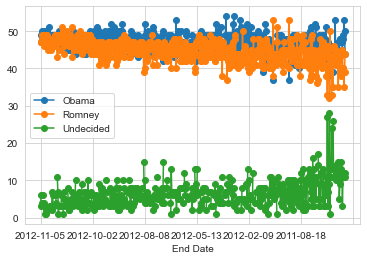

In [18]:
# plot Obama,Romney and Undecided favors against End Date
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],style='',marker='o')

Note that the End Date is plotted in a reversed order such that the left-hand side contains earlier dates and the right-hand side contains the latter dates. Therefore, it shows the change in voter sentiments as the elections date approached. We can see that the trend of undecided voters tend to go down as the elections date approached, which makes sense beacause as elections date get closer, most undecided voters would have chosen or decided on which candidate to vote for.

On the other hand, we can also see that as elections get near, Obama and Romney get closer and closer to each other.

##### Qn 5.) How did voter sentiment change over time?

For a better visulization of how the voter sentiments changed over time, it would be good if we investigate the difference between the percentages of voters that favored Obama and those that favored Romney.

To answer this, we will create in our polls dataframe another column that shows the difference between Obama and Romney percentages (favors) over time.

In [19]:
# let's first import datetime module for dealing with time stamps
from datetime import datetime

In [20]:
# create a new column that calculates the difference between Obama and Romney
poll_df['Difference'] = poll_df.Obama - poll_df.Romney

# preview the dataframe now with the newly added column
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.0
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,2.0
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.0
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,1.0
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-1.0


Remember that the difference is Obama minus Romney. So a positive indicates a leaning towards Obama while a negative indicates a leaning towards Romney.

We will now get into visualizing how the difference in voter sentiments changed over time. We will start by using groupby to group the polls by their Start Date and then sorting it by that Start Date.

In [21]:
# redefine the polls dataframe using groupby to group the polls by their Start Date
# Set as_index=Flase to keep the 0,1,2,... index. Then take the mean of the polls on that day.
daily_poll = poll_df.groupby('Start Date',as_index=False).mean()

# preview the dataframe to see the changes
daily_poll.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.0
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,11.0
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,18.0
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,8.0
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,9.0


In [22]:
# preview the last five rows of the dataframe
daily_poll.tail()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
352,2012-10-31,10420.250000,48.00,46.50,4.000000,2.0,NaN,1,1.50
353,2012-11-01,1989.000000,49.00,47.25,2.400000,1.5,NaN,1,1.75
354,2012-11-02,1041.750000,49.25,48.50,2.000000,1.0,NaN,1,0.75
355,2012-11-03,1310.833333,48.50,48.00,4.333333,1.0,NaN,1,0.50
356,2012-11-04,1000.000000,47.00,47.00,6.000000,NaN,NaN,1,0.00


We now have all the averages for a particular day.

Great, we can plot the difference versus time.

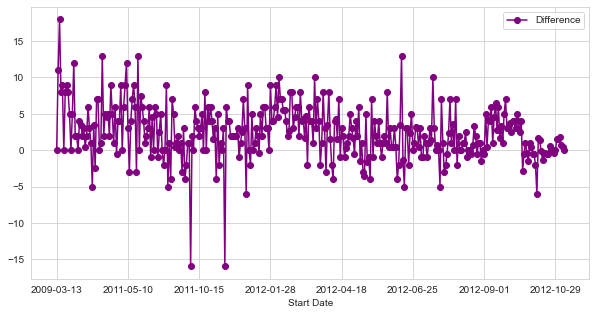

In [23]:
# plot Start Date versus Difference
daily_poll.plot('Start Date','Difference',figsize=(10,5),style='-',marker='o',color='purple')

It looks like for most of the years Obama was leading in the polls. (Remember we did Obama minus Romney. A positive favors Obama, a negative favors Romney).

It's interesting to see that around 15TH 0ctober 2011, Romney was strongly in the lead. Perhaps there was something that happened in his mode of campaigns that surged more favors towards him.

However, we notice that around 29TH October 2012 (towards the elections) Obama and Romney were racing quite closely and closely to each other.

##### Qn 6.) Can we see an effect in the polls from the debate?

It would be very interesting to plot marker lines on the dates of the debates and see if there is any general insight to the poll results.

The debate dates were Oct 3rd, Oct 11, and Oct 22nd, 2012. Let's plot some lines as markers and then zoom in on the month of October, 2012.

In order to find where to set the x limits for the figure we need to find out where the index for the month of October in 2012 is. Here's a simple for loop to find that row. Note, the string format of the date makes this difficult to do without using a lambda expression or a map.

In [24]:
# set row count and x-limit list
row_in = 0
xlimit = []

# Cycle through the dates until 2012-10 is found
for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in += 1

# then print row index

print (min(xlimit))
print (max(xlimit))

18
100


Cool. Let's now plot how the sentiments changed over the month of October, when the debates were happening.

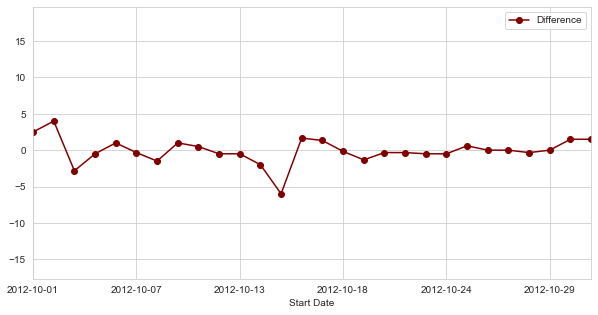

In [25]:
# plot voters sentiments for the month of October, 2012
daily_poll.plot('Start Date','Difference',figsize=(10,5),style='-',marker='o',color='maroon',xlim=(325,352))

We can add markers to the plot on the specific days that the debates took place and see if the debates affected voters sentiments.

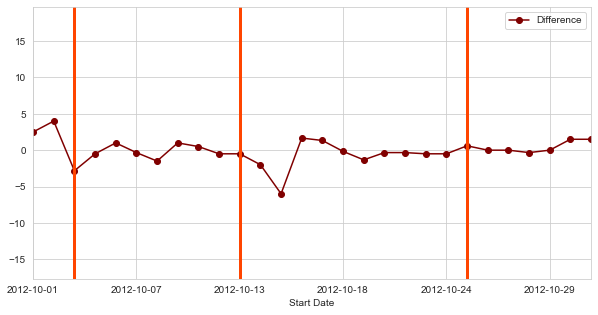

In [26]:
# plot voters sentiments for the month of October, 2012 and add markers at Oct 3rd, Oct 11th and Oct 22nd
daily_poll.plot('Start Date','Difference',figsize=(10,5),style='-',marker='o',color='maroon',xlim=(325,352))

# add debate markers
# Oct 3rd, 2 days after Oct 1st(index 325)
plt.axvline(x=325+2, linewidth=3, color='orangered')

# Oct 11th, 10 days after Oct 1st
plt.axvline(x=325+10, linewidth=3, color='orangered')

# Oct 22nd, 21 days after Oct 1st
plt.axvline(x=325+21, linewidth=3, color='orangered')

It looks like after the 1st debate, favors for Obama increased, after the 2nd debate Romney was more favored and after the 3rd debate the sentiments or favors for the two candidates were evenly distributed.

There is high chances that the change of voter sentiments towards the two candidates during and after the debates depended on the performance of each candidate in the debates, i.e how each candidate convinced the voters through the debates.

However, for all these polls it is important to remember how geographical location and other factors can affect the value of a poll in predicting the outcomes of a national election.

In [27]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.0
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,2.0
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.0
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,1.0
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-1.0


## Donor Dataset

Welcome now to the second dataset in our project! Donor dataset. This dataset contains information on donations to the federal campaigns.

The questions we will try to answer in this project are as follows:

    1.) How much was donated and what was the average donation?
    2.) How did the donations differ between candidates?
    3.) How did the donations differ between Democrats and Republicans?
    4.) What were the demographics of the donors?
    5.) Is there a pattern to donations amount?
    
Great! Let's get to the analysis of the dataset.

In [28]:
# we will first grab our dataset, which is in csv format, and set it as a dataframe. 
# we will call this dataframe 'donor_df'
donor_df = pd.read_csv('Election_Donor_Data.csv')

C:\Users\BEN KOLE\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
# Now that we have defined our dataframe, let's preview it to see how it looks like
# we will preview the first five rows by calling .head() method on the dataframe
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [30]:
# we can also get a quick overview of the dataframe or some information about it by calling the .info() method on it
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

Our dataframe has 16 variables (columns) to work with and 1,001,731 entries (rows). It's quite big.

In [31]:
# we can also check the total number of null or missing values in each column
print(donor_df.isnull().sum())

cmte_id                   0
cand_id                   0
cand_nm                   0
contbr_nm                 0
contbr_city              19
contbr_st                 4
contbr_zip              111
contbr_employer       13729
contbr_occupation      8430
contb_receipt_amt         0
contb_receipt_dt          0
receipt_desc         987565
memo_cd              909249
memo_text            903961
form_tp                   0
file_num                  0
dtype: int64


Let's understand some of the columns we will be messing around with:

    cmte_id - cmte ID                  
    cand_id - Candidate ID                 
    cand_nm- Candidate name                 
    contbr_nm - contributor name                
    contbr_city - contributor city             
    contbr_st - contributor state               
    contbr_zip - contributor zip code            
    contbr_employer - contributor employer      
    contbr_occupation - contributor occupation      
    contb_receipt_amt - contributor receipt amount in US dollars        
    contb_receipt_dt - contributor receipt date         
    receipt_desc - receipt description

In [32]:
# preview the dataframe again
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


Let's look at the donations contributed; the average donation and the standard deviation.

In [33]:
# we will look at the frequency of the various donations amount contributed
donor_df['contb_receipt_amt'].value_counts()

100.00    178188
50.00     137584
25.00     110345
250.00     91182
500.00     57984
           ...  
97.15          1
122.32         1
188.65         1
122.40         1
132.12         1
Name: contb_receipt_amt, Length: 8079, dtype: int64

There are 8079 different amounts donated. How about their average and standard deviation?

In [34]:
# let's check the average amount donated and the standard deviation

# mean
don_mean = donor_df['contb_receipt_amt'].mean()

# standard deviation
don_std = donor_df['contb_receipt_amt'].std()

# print the mean and the standard deviation to 2 decimal places
print('The average amount donated was %.2f dollars with a standard deviation of %.2f dollars.'%(don_mean,don_std))

The average amount donated was 298.24 dollars with a standard deviation of 3749.67 dollars.


A standard deviation of 3749.67 is very large for a mean of 298.24! Could there be any large donations or other factors messing with the distribution of the donations?

In [35]:
# Let's make a series from the dataframe which is a copy of the amount column
# we will use .copy() method on the amount column
# We shall call this series 'top_donor'
top_donor = donor_df['contb_receipt_amt'].copy()

# We shall then sort the series
top_donor.sort_values()

# Then check the first top 50 rows of the Series
top_donor.head(50)

0      250.0
1       50.0
2      250.0
3      250.0
4      300.0
5      500.0
6      250.0
7      250.0
8      250.0
9      250.0
10     250.0
11     500.0
12     250.0
13     250.0
14     250.0
15     300.0
16     500.0
17    1000.0
18     250.0
19     300.0
20     500.0
21     250.0
22    2500.0
23    2500.0
24     150.0
25     200.0
26     100.0
27     250.0
28     500.0
29     250.0
30     100.0
31     500.0
32    1000.0
33     250.0
34     300.0
35     100.0
36     250.0
37     250.0
38     250.0
39     250.0
40     500.0
41   -1500.0
42     250.0
43     500.0
44     250.0
45     260.0
46     500.0
47     250.0
48     240.0
49     100.0
Name: contb_receipt_amt, dtype: float64

In [36]:
# let's also check the last 50 rows of the Series
top_donor.tail(50)

1001681    2500.0
1001682    2500.0
1001683    2500.0
1001684    2500.0
1001685    2500.0
1001686    2500.0
1001687    2500.0
1001688    2500.0
1001689    2500.0
1001690    2500.0
1001691    2500.0
1001692    2500.0
1001693    5000.0
1001694    2500.0
1001695     625.0
1001696    1000.0
1001697    1500.0
1001698    2500.0
1001699    2500.0
1001700     300.0
1001701    2500.0
1001702    2500.0
1001703   -2500.0
1001704   -2500.0
1001705    1000.0
1001706    2500.0
1001707   -2500.0
1001708    2500.0
1001709   -2500.0
1001710   -2500.0
1001711    1000.0
1001712    2500.0
1001713    2500.0
1001714     250.0
1001715     250.0
1001716    1000.0
1001717     100.0
1001718    2500.0
1001719    2500.0
1001720     100.0
1001721     250.0
1001722     100.0
1001723     100.0
1001724     500.0
1001725    2500.0
1001726    5000.0
1001727    2500.0
1001728     500.0
1001729     500.0
1001730    2500.0
Name: contb_receipt_amt, dtype: float64

Looks like there were some negative values, as well as some huge donation amounts recorded! There are negative values because FEC (where the data is from) were recording both refunds and donations. So, there are negative values because FEC recorded amounts refunded after the contributions. We will therefore get rid of these negative (refund) amounts and work with positive values only.

In [37]:
# redefine the top_donor series to be non-negatives
top_donor = top_donor[top_donor > 0]

# preview the series
top_donor

0           250.0
1            50.0
2           250.0
3           250.0
4           300.0
            ...  
1001726    5000.0
1001727    2500.0
1001728     500.0
1001729     500.0
1001730    2500.0
Name: contb_receipt_amt, Length: 991475, dtype: float64

Now we have postive values only in the series.

In [38]:
# sort the top_donor series
top_donor.sort_values()

# preview the top ten most common donations in the sorted series
# remember we are now dealing with positive values only
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

The top ten most common donations range from 10 dollars to 2500 dollars.

A quick question we could verify is if donations are usually made in round number amounts? (e.g. 25,50,100,500,1000 etc.) We can quickly visualize this by making a histogram and checking for peaks at those values. Let's go ahead and do this for the most common amounts, up to 2500 dollars.

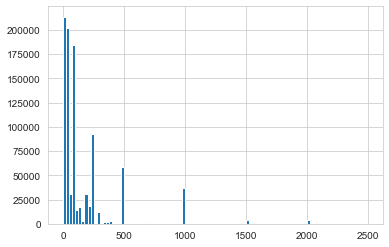

In [39]:
# We will create a Series of the common donations limited to 2500
# we shall call this series 'common_don'
common_don = top_donor[top_donor < 2500]

# We shall do a histogram of this most common donations
# Set a high number of bins to account for the non-round donations and check histogram for spikes.
common_don.hist(bins=100)

Looks like our intuition was right, since we spikes at the round numbers.

Let's dive deeper into the data and see if we can seperate donations by Party. In order to do this we'll have to figure out a way of creating a new 'Party' column. We can do this by starting with the candidates and their affliliation. Now let's go ahead and get a list of candidates.

In [40]:
# preview donor_df
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


To get a list of candidates, we will grab the unique values in 'cand_nm' column. (Values in this column are candidates' names, so basically we are grabbing unique names since each candidate has a unique name)

In [41]:
# grab unique values from 'cand_nm' column and define them as a candidates array
candidates = donor_df['cand_nm'].unique()

# preview candidates
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [42]:
# find how many candidates are there
len(candidates)

13

There are 13 candidates in our list. Notice that Obama is the only Democrat in the candidates' list (based on the knowledge from the US 2012 election presidential's candidates).

We will now get into separating the candidates by creating a column that indicates the party for each candidate (based on known facts concerning the 2012 election). To achieve this we shall make a dictionary of candidates and their respective parties, then use map method on the candidate name column to assign each candidate his/her party.

In [43]:
# create a dictionary of parties
party_dict = {
    'Bachmann, Michelle':'Republican', 
    'Romney, Mitt':'Republican', 
    'Obama, Barack':'Democrat',
    "Roemer, Charles E. 'Buddy' III":'Republican', 
    'Pawlenty, Timothy':'Republican',
    'Johnson, Gary Earl':'Republican', 
    'Paul, Ron':'Republican', 
    'Santorum, Rick':'Republican',
    'Cain, Herman':'Republican', 
    'Gingrich, Newt':'Republican', 
    'McCotter, Thaddeus G':'Republican',
    'Huntsman, Jon':'Republican', 
    'Perry, Rick':'Republican'
}

Alternatively, we could create a for loop that does the same operation, although it's a slower approach.

In [44]:
# this is how we could do it using a for loop
"""
for i in range(0,len(donor_df)):
    if donor_df['cand_nm'][i] == 'Obama, Barack':
        donor_df['Party'][i] = 'Democrat'
    else:
        donor_df['Party'][i] = 'Republican'
"""

"\nfor i in range(0,len(donor_df)):\n    if donor_df['cand_nm'][i] == 'Obama, Barack':\n        donor_df['Party'][i] = 'Democrat'\n    else:\n        donor_df['Party'][i] = 'Republican'\n"

In [45]:
# now create a 'Party' column that maps the party with candidate
donor_df['Party'] = donor_df['cand_nm'].map(party_dict)

In [46]:
# let's view our donor dataframe now and inspect the changes
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


Great, we now have a column that shows each candidate's party.

Another thing we could do is clear all the refunded contribution amounts.

In [47]:
# redefine the donor dataframe and clear the refunds amount(the negative contributions)
donor_df = donor_df[donor_df['contb_receipt_amt'] > 0]

# inspect the donor_df with refunds cleared
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


Let's start by aggregating the data by candidate. We'll take a quick look a the total amounts received by each candidate. First we will look a the total number of donations and then at the total amount.

In [48]:
# Groupby the dataframe by candidate name and then display the total number of people who donated for each candidate
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

It looks like Obama is getting the highest donations and that could be because he is the only Democrat nominee in the list. 

How about the total dollar amount received by each candidate? To answer this, we shall again group the dataframe by candidate name but this time we are going to display the total amount donated.

In [49]:
# Groupby the dataframe by candidate name and then display the total amount donated for each candidate
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

The above is the total amount received by each candidate but unfortunately it's not easily readable. (Data Analysis is about presenting your information in a clear manner). We could print out a statement for each candidate that can be easily understood.

In [50]:
# first set the grouby object and define it as 'cand_amount' object
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

# then, create a for loop that prints out a statement for each candidate
# remember, in the cand_amount object, the candidate name is the index and the amount is the value for that index
# set the index tracker first
i = 0

# the for loop
for amount in cand_amount:
    print('The candidate %s received a total of %.0f dollars donation.'%(cand_amount.index[i],amount))
    print('/n')
    i += 1

The candidate Bachmann, Michelle received a total of 2711439 dollars donation.
/n
The candidate Cain, Herman received a total of 7101082 dollars donation.
/n
The candidate Gingrich, Newt received a total of 12832770 dollars donation.
/n
The candidate Huntsman, Jon received a total of 3330373 dollars donation.
/n
The candidate Johnson, Gary Earl received a total of 566962 dollars donation.
/n
The candidate McCotter, Thaddeus G received a total of 39030 dollars donation.
/n
The candidate Obama, Barack received a total of 135877427 dollars donation.
/n
The candidate Paul, Ron received a total of 21009620 dollars donation.
/n
The candidate Pawlenty, Timothy received a total of 6004819 dollars donation.
/n
The candidate Perry, Rick received a total of 20305754 dollars donation.
/n
The candidate Roemer, Charles E. 'Buddy' III received a total of 373010 dollars donation.
/n
The candidate Romney, Mitt received a total of 88335908 dollars donation.
/n
The candidate Santorum, Rick received a tot

However, the above statements do not give us a quick comparison between candidates. To overcome that, we will get a graphical representation of the amount received by each candidate using a bar plot.

Text(0, 0.5, 'Amount_Received($)')

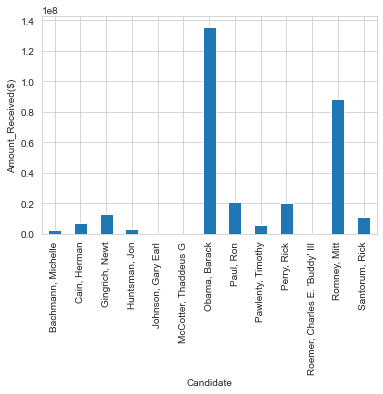

In [51]:
# create a bar plot of total amount received by each candidate
cand_amount.plot(kind='bar')

# set the x-label
plt.xlabel('Candidate')

# set the y-label
plt.ylabel('Amount_Received($)')

It's now easy to compare clearly between candidates. We can see that Obama received the highest donations followed by Romney. 

It makes sense for Obama receiving huge amount of donations because he is not competing with any Democrat. So, any donations by Democrat supporters go to him. However, the Republican supporters donations is split among the many Republican candidates.

We can also compare how the donations is split between Democrat and Republican parties. To achieve that, we shall group our donor dataframe by party, then get the total amount for each party.

Text(0, 0.5, 'Amount_Donated($)')

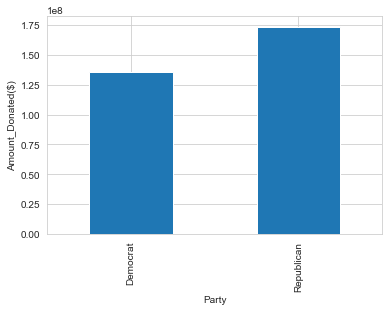

In [52]:
# group the donor dataframe by party the get the total amount for each party
# set the groupby object as 'party_don'
party_don = donor_df.groupby('Party')['contb_receipt_amt'].sum()

# create a barplot of the 'party_don' object
party_don.plot(kind='bar')

# label the y-axis
plt.ylabel('Amount_Donated($)')

The Democrats could not compete with the Republicans in the donations, since the Republicans got the highest donations.

However, Obama, being the only Democrat candidate was advantaged generally in the funding because the Republicans had to split their fundings across multiple candidates.

Finally as we finalize our analysis in this election data project, we will look at where the donations came from (as far as occupation is concerned). We will start by grabbing the occupation information from the donor dataframe. Then, we will use pivot_table to create an occupation dataframe with index defined by the various occupations and the columns defined by the Party (Republican or Democrat). We shall also pass an aggregation function in the pivot table; in this case a simple sum function that adds up all the contributions by anyone with the same occupation.

In [53]:
# let's preview the donor_df once more
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [54]:
# Use a pivot table to extract and organize the data by the donor's occupation
occupation_df = donor_df.pivot_table(values='contb_receipt_amt',
                                    index='contbr_occupation',
                                    columns='Party')

In [55]:
# let's preview the occupation dataframe
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,1300.0,NaN


In [56]:
# preview the last five rows of the occupation dataframe
occupation_df.tail()

Party,Democrat,Republican
contbr_occupation,,
ZOOKEEPER,35.000000,NaN
ZOOLOGIST,133.333333,NaN
ZOOLOGY EDUCATION,25.000000,NaN
\NONE\,NaN,250.0
~,NaN,75.0


So, we have a dataframe that shows the total amount that all donors in a particular occupation contributed for each party. For example, the teachers in the dataset donated a total of 500 dollars for the Democrat party and none donated for the Republican party.

Let's check the size of the dataframe.

In [57]:
# check the size of occupation_df
occupation_df.shape

(45067, 2)

Our occupation dataframe has 45067 entries (occupations) . That's quite big to display effectively with a small, static visualization. What we should do is have a cut-off for total contribution amounts.

Let's first check the summary statistics of this occupation dataframe.

In [58]:
# get the summary statistics of the occupation dataframe.
occupation_df.describe()

Party,Democrat,Republican
count,29166.000000,21081.000000
mean,268.685681,511.550120
std,460.693049,754.029877
min,2.005714,1.000000
25%,50.000000,83.580000
50%,100.000000,201.200000
75%,250.000000,500.000000
max,5000.000000,5000.000000


Similarly, to get a graphical representation of the summary statistics we can do a boxplot.

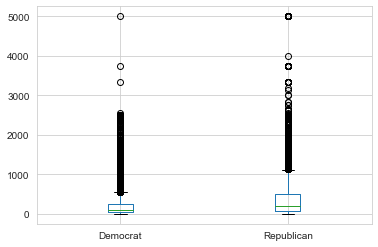

In [59]:
occupation_df.boxplot()

We can also do a quick histogram that shows the distribution of dollar amounts donated.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028405A0E308>,
      dtype=object)

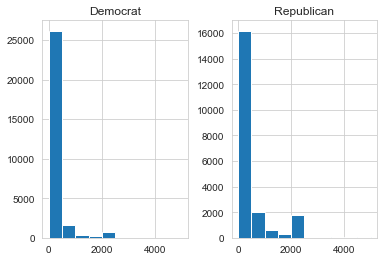

In [60]:
occupation_df.hist()

For both parties, it looks like most donors contributed amount less than 500 dollars. Let's check at the mode donation for both parties.

In [61]:
occupation_df['Democrat'].mode()

0    250.0
dtype: float64

In [62]:
occupation_df['Republican'].mode()

0    250.0
dtype: float64

So let's set our cut off at 5000 dollars.

In [63]:
# set the cut-off sum of donations at 5000 dollars
occupation_df = occupation_df[occupation_df.sum(1) > 5000]

In [64]:
# let's check the size of our occupation dataframe now
occupation_df.shape

(6, 2)

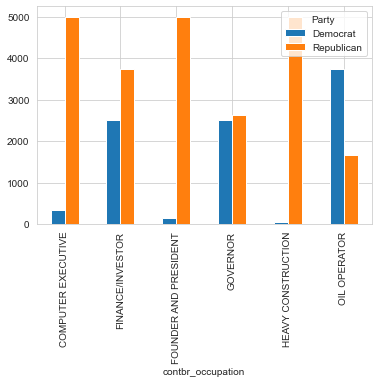

In [65]:
# plot out with pandas
occupation_df.plot(kind='bar')

For a better view, we shall plot the bar horizontally.

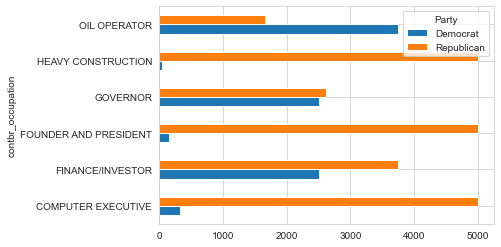

In [66]:
# plot out with pandas using kind='barh'
occupation_df.plot(kind='barh')

Great! With nice visualisations of the occupation column, it becomes easy and quick to navigate on how different groups based on occupation contributed towards the parties during the elections and campaigns.

That's it!

### Thanks for going through this data analysis project !!!.